<a href="https://colab.research.google.com/github/ham952/ioccg/blob/main/IOCCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
excel_file = '/content/drive/MyDrive/IOP_AOP_Sun30.xls'

In [12]:
sheet_name = 'Basics'
# To read all sheets in the Excel file, omit the sheet_name parameter
data_frame = pd.read_excel(excel_file, sheet_name=sheet_name)

'''
# Loop over all sheets in the Excel file
for sheet_name, data_frame in data_frames.items():
    print(sheet_name)
    print(data_frame.head()) # display the first few rows of the data frame
'''
print(data_frame.head())

   wavelength      a_w      bb_w
0         400  0.00663  0.003798
1         410  0.00473  0.003398
2         420  0.00454  0.003048
3         430  0.00495  0.002748
4         440  0.00635  0.002448


In [13]:
print(data_frame['wavelength'])

0     400
1     410
2     420
3     430
4     440
5     450
6     460
7     470
8     480
9     490
10    500
11    510
12    520
13    530
14    540
15    550
16    560
17    570
18    580
19    590
20    600
21    610
22    620
23    630
24    640
25    650
26    660
27    670
28    680
29    690
30    700
31    710
32    720
33    730
34    740
35    750
36    760
37    770
38    780
39    790
40    800
Name: wavelength, dtype: int64


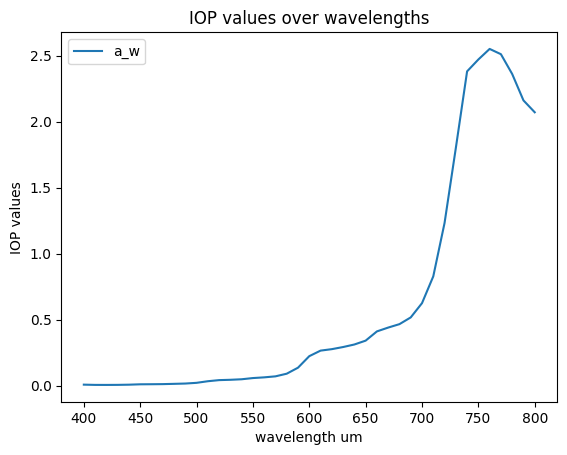

In [14]:
data_frame.plot(kind='line', x='wavelength', y=['a_w'])

# Set the title and axis labels
plt.title('IOP values over wavelengths')
plt.xlabel('wavelength um')
plt.ylabel('IOP values')

# Display the plot
plt.show()

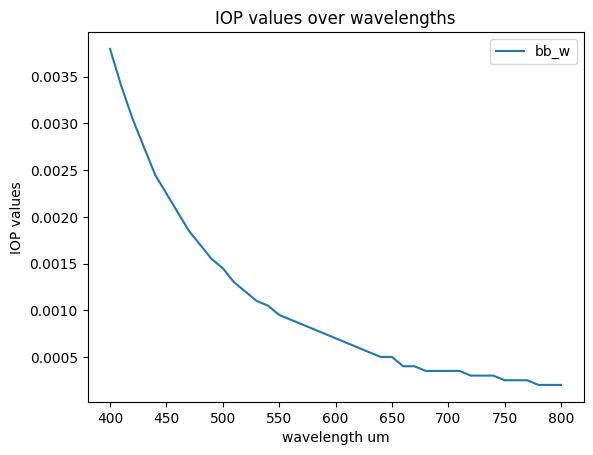

In [15]:
data_frame.plot(kind='line', x='wavelength', y=['bb_w'])

# Set the title and axis labels
plt.title('IOP values over wavelengths')
plt.xlabel('wavelength um')
plt.ylabel('IOP values')

# Display the plot
plt.show()

In [16]:
sheet_name = 'a_ph'
# To read all sheets in the Excel file, omit the sheet_name parameter
data_frame = pd.read_excel(excel_file, sheet_name=sheet_name)

'''
# Loop over all sheets in the Excel file
for sheet_name, data_frame in data_frames.items():
    print(sheet_name)
    print(data_frame.head()) # display the first few rows of the data frame
'''
print(data_frame.head())

    [C]       400       410       420       430       440       450       460  \
0  0.03  0.003464  0.004081  0.004745  0.005359  0.005567  0.005501  0.005198   
1  0.03  0.002353  0.003362  0.004431  0.005198  0.005567  0.005451  0.005006   
2  0.03  0.003890  0.004663  0.005233  0.005640  0.005567  0.005129  0.004639   
3  0.03  0.003935  0.004423  0.004994  0.005423  0.005567  0.005258  0.004653   
4  0.03  0.003001  0.003912  0.004789  0.005289  0.005567  0.005361  0.004908   

        470       480  ...       710       720           730           740  \
0  0.004587  0.004151  ...  0.000036  0.000013  4.464379e-06  1.577192e-06   
1  0.004203  0.003612  ...  0.000044  0.000016  5.495513e-06  1.941474e-06   
2  0.004038  0.003598  ...  0.000006  0.000001  3.294513e-07  7.714039e-08   
3  0.003945  0.003517  ...  0.000016  0.000005  1.359301e-06  3.965795e-07   
4  0.004267  0.003632  ...  0.000032  0.000010  3.098445e-06  9.652864e-07   

            750           760           770 

In [17]:
wavelengths = data_frame.columns[1:].values

In [18]:
C = data_frame.iloc[:,0].values

In [19]:
a_ph = data_frame.iloc[0,1:].values

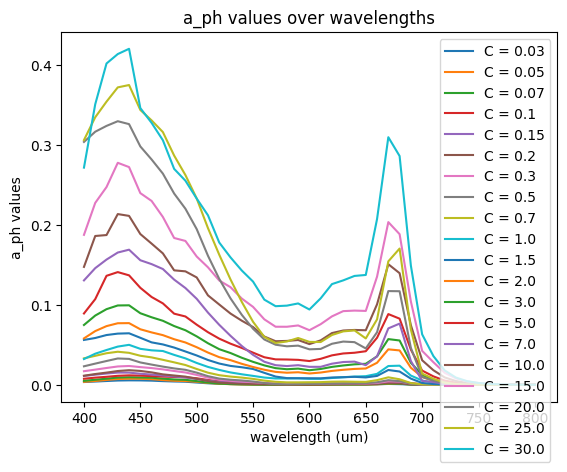

In [20]:
# Set the title and axis labels
plt.title('a_ph values over wavelengths')
plt.xlabel('wavelength (um)')
plt.ylabel('a_ph values')

for i in range(20):
  j = i *25
  a_ph = data_frame.iloc[j,1:].values
  plt.plot(wavelengths,a_ph, label='C = {}'.format(C[j]))

plt.legend()

In [21]:
for i in range(20):
  j = i *25
  print(C[j])


0.03
0.05
0.07
0.1
0.15
0.2
0.3
0.5
0.7
1.0
1.5
2.0
3.0
5.0
7.0
10.0
15.0
20.0
25.0
30.0


In [22]:
sheet_name = 'a'
# To read all sheets in the Excel file, omit the sheet_name parameter
data_frame_a = pd.read_excel(excel_file, sheet_name=sheet_name)

def a(wavelength):
  return data_frame_a[wavelength].values

a_400 = a(400)

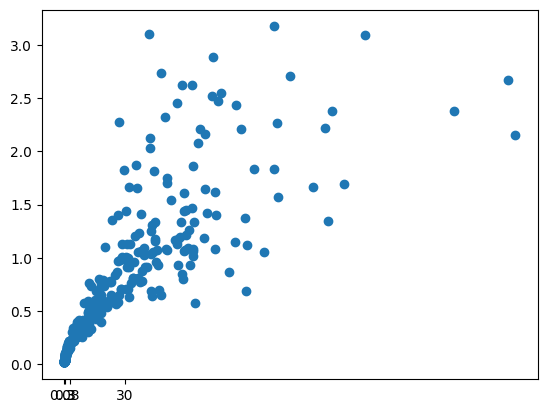

In [109]:
a_440 = a(440)
#specify x-axis locations
x_ticks = [0.03,0.3,3,30]

#specify x-axis labels
x_labels = [0.03,0.3,3,30] 

#add x-axis values to plot
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.scatter(C, a_440)

In [24]:
sheet_name = 'Rrs'
# To read all sheets in the Excel file, omit the sheet_name parameter
data_frame_rrs = pd.read_excel(excel_file, sheet_name=sheet_name)

def Rrs(wavelength):
  return data_frame_rrs[wavelength].values

Rrs_400 = Rrs(400)

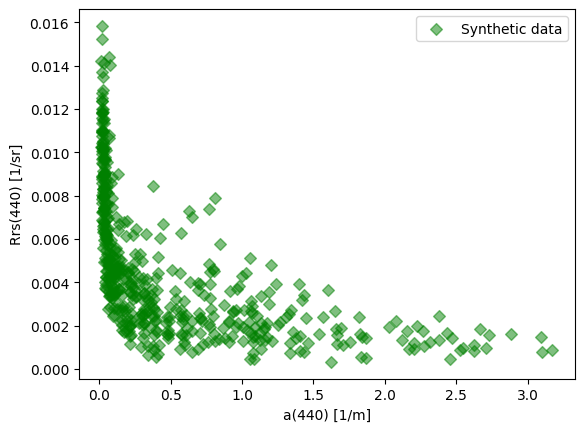

In [25]:
# Dataset Dynamics
a440 = a(440)
Rrs440 = Rrs(440)

plt.xlabel('a(440) [1/m]')
plt.ylabel('Rrs(440) [1/sr]')


plt.scatter(a440,Rrs440, marker = 'D', alpha=0.5, c = 'green', label='Synthetic data')
plt.legend()

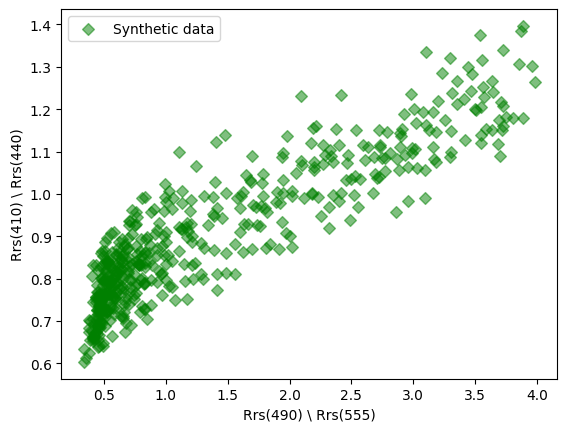

In [26]:
# Dataset Dynamics
Rrs490_Rrs555 = Rrs(490)/Rrs(550)
Rrs410_Rrs440 = Rrs(410)/Rrs(440)


plt.xlabel('Rrs(490) \ Rrs(555)')
plt.ylabel('Rrs(410) \ Rrs(440)')


plt.scatter(Rrs490_Rrs555,Rrs410_Rrs440, marker = 'D', alpha=0.5, c = 'green', label='Synthetic data')
plt.legend()

In [27]:
from sklearn.metrics import r2_score, mean_squared_error

def metrics(known, derived):

  # create two arrays of actual and predicted values
  a_known = known
  a_derived = derived

  # calculate the mean of actual values
  a_known_mean = np.mean(a_known)

  # calculate the sum of squares of differences of actual values from their mean
  tss = np.sum(np.square(a_known - a_known_mean))

  # calculate the sum of squares of differences between actual and predicted values
  rss = np.sum(np.square(a_known - a_derived))

  # calculate R2 score
  #r2 = 1 - (rss / tss)

  # calculate RMSE score
  #rmse = np.sqrt(mean_squared_error(a_known, a_derived))
  rmse = np.sqrt(np.sum( (np.log10(a_derived)-np.log10(a_known))**2) /len(a_known))
  
  r2 = r2_score(known,derived)


  return r2, rmse


In [28]:
def reg_statn(XX, YY, log_base):
    # meas = XX, pred = YY
    # log_base = 10, exp(1) or any other number which means not log based
    # Computes the Reduced Major Axis (RMA, type 2) or Least square regression (type 1)
    #
    # The function returns an array with :
    #
    #	N : Number of samples
    #	Intercept
    #	Slope
    #	R^2
    #	RMS
    #	Bias

    nb_obs = len(XX)
    if log_base == 10:
        logbase = 10
        obs = np.log10(XX)
        theo = np.log10(YY)
    elif log_base == np.exp(1):
        logbase = np.exp(1)
        obs = np.log(XX)
        theo = np.log(YY)
    else:
        obs = XX
        theo = YY

    sum_obs = np.sum(obs)
    sum_theo = np.sum(theo)
    sum_sq_obs = np.sum(obs**2)
    sum_sq_theo = np.sum(theo**2)

    buf = theo - obs
    sum_diff = np.sum(buf)

    buf = buf**2
    sum_sq_diff = np.sum(buf)

    buf = theo * obs
    cov = np.sum(buf)

    rms1 = np.sqrt(sum_sq_diff / (nb_obs - 2))

    bias = sum_diff / nb_obs

    avg_obs = np.sum(obs) / nb_obs
    avg_theo = np.sum(theo) / nb_obs

    cov = (cov / nb_obs) - (avg_obs * avg_theo)

    stdv_obs = np.sqrt((sum_sq_obs - (sum_obs**2 / nb_obs)) / nb_obs)
    stdv_theo = np.sqrt((sum_sq_theo - (sum_theo**2 / nb_obs)) / nb_obs)

    slope_t1 = cov / stdv_obs**2
    slope_t2 = stdv_theo / stdv_obs

    intercept_t1 = avg_theo - (slope_t1 * avg_obs)
    intercept_t2 = avg_theo - (slope_t2 * avg_obs)

    rsq = (cov / (stdv_obs * stdv_theo))**2

    return nb_obs, intercept_t1, intercept_t2, slope_t1, slope_t2, rsq, rms1, bias


In [129]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plotting (known, derived, r2, rmse, textpos_r2 = 0.03, textpos_rmse = 0.02):
  # Define the x-axis scale values

  x_values = [0.01, 0.03, 0.1, 0.3, 1, 3,10]
  x = x_values

  plt.scatter(known, derived)
  # Set the x-axis tick positions and labels

  #'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'
  scale = 'log'
  plt.xscale(scale)
  plt.yscale(scale)

  plt.xticks(x_values)
  plt.yticks(x_values)

  formatter = ticker.ScalarFormatter()
  formatter.set_scientific(False)
  plt.gca().xaxis.set_major_formatter(formatter)
  plt.gca().yaxis.set_major_formatter(formatter)
  plt.plot(x, x, linestyle='--', color='black')

  plt.xlabel('Known a(440) [1/m]')
  plt.ylabel('Derived a(440) [1/m]')

  plt.text(1,textpos_r2,s='$\mathregular{R^2}$ = '+ f'{r2:0.3f}')
  plt.text(1,textpos_rmse,s='RMSE = '+ f'{rmse:0.3f}')

  # Plot the data
  plt.scatter(known, derived,  marker='o', edgecolors='red', facecolors='none', alpha=0.3)

  plt.show()

# **Chapter 4**
# **Simple Algorithms for Absorption Coefficients**

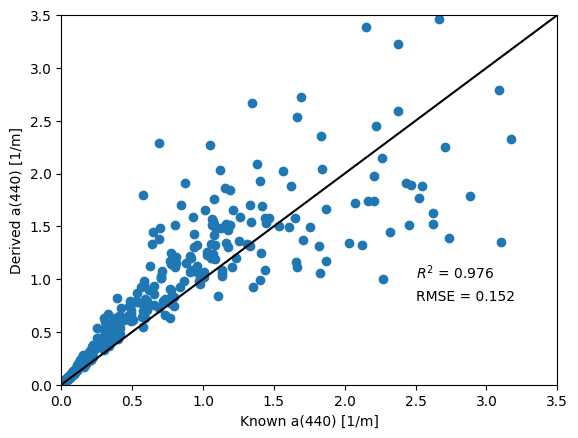

In [119]:
# One-Step Spectral Ratio Algorithm
# Lee et al. (1998b)

A0 = -0.674
A1 = -0.531
A2 = -0.745

B1 = -1.469
B2 = 2.375

Rrs_555 = np.mean([Rrs(550),Rrs(560)], axis=0)
#Rrs_555 = Rrs(550)

p25 = np.log10(Rrs(440)/Rrs_555)
p35 = np.log10(Rrs(490)/Rrs_555)

log_a440 = A0 + A1*p25 + A2*(p25)**2 + B1*p35 + B2*(p35)**2

#a440_derived = np.exp(log_a440) 
a440_derived = 10**log_a440 

a440_known = a(440)

r2, rmse = metrics(a440_known, a440_derived)
nb_obs, intercept_t1, intercept_t2, slope_t1, slope_t2, rsq, rms1, bias = reg_statn(a440_known, a440_derived, log_base=10)

plt.xlabel('Known a(440) [1/m]')
plt.ylabel('Derived a(440) [1/m]')
plt.xlim([0, 3.5])
plt.ylim([0, 3.5])

plt.text(2.5,1,s='$R^2$ = '+ f'{rsq:0.3f}')
plt.text(2.5,0.8,s='RMSE = '+ f'{rms1:0.3f}')

plt.scatter(a440_known,a440_derived)
plt.plot([0,5], [0,5], 'k-')

In [ ]:
corr_matrix = np.corrcoef(a440_known, a440_derived)
corr = corr_matrix[0,1]
R_sq = corr**2
print(R_sq)

0.7986281501076063


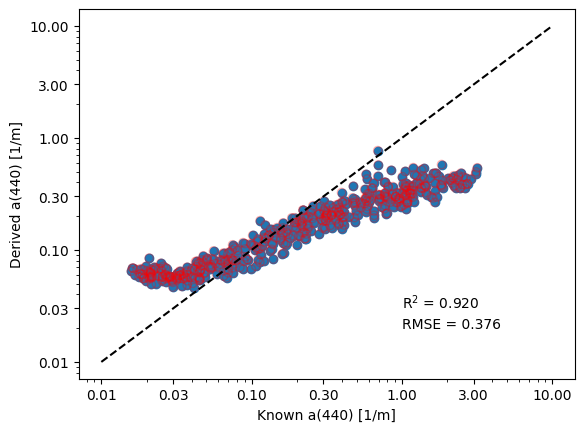

In [130]:
# Spectral Curvature Algorithm
# Barnard et al. (1999).

Y1 = 1.561
Y2 = -0.012
Y3 = 0.319
Y4 = 0.067

lambda1 = 440
lambda2 = 490
lambda3 = 550

R1 = Rrs(lambda1)/Rrs(lambda2)
R2 = Rrs(lambda2)/Rrs(lambda3)

Rrs3 = R1/R2

a490_derived = ( - (Y1*Y4 + Y2*Y3) - np.sqrt( (Y1*Y4 + Y2*Y3)**2 - 4*(Y1*Y3 - (0.975/Rrs3) ) * (Y2*Y4) ) ) / ( 2* (Y1*Y3 - 0.975/Rrs3) )
a440_derived = Y1*a490_derived + Y2

a440_known = a(440)

#r2, rmse = metrics(a440_known, a440_derived)
nb_obs, intercept_t1, intercept_t2, slope_t1, slope_t2, r2, rmse, bias = reg_statn(a440_known, a440_derived, log_base=10)

plotting (a440_known, a440_derived, r2, rmse)


In [123]:
print(nb_obs, intercept_t1, intercept_t2, slope_t1, slope_t2, r2, rmse, bias)

500 -0.4940751067017884 -0.48037339590795364 0.47110592949238383 0.4911340746262725 0.9201041897327931 0.3758991297621497 -0.13224661253896594


In [124]:
print(Rrs(440)[:10])
print()
print(print(Rrs(490)[:10]))
print()
print(Rrs(510)[:10])
print()
print(np.maximum(Rrs(440), Rrs(490), Rrs(510))[:10])
#Rrs(440)

[0.012722  0.008572  0.010238  0.012384  0.011016  0.011373  0.011604
 0.0089127 0.01041   0.011821 ]

[0.0072784 0.005724  0.0065018 0.0087411 0.0065479 0.007002  0.0072635
 0.0054884 0.0067739 0.0080572]
None

[0.012722  0.008572  0.010238  0.012384  0.011016  0.011373  0.011604
 0.0089127 0.01041   0.011821 ]

[0.012722  0.008572  0.010238  0.012384  0.011016  0.011373  0.011604
 0.0089127 0.01041   0.011821 ]


In [125]:
excel_file1 = '/content/drive/MyDrive/Andre_Morel.xls'
data_frame_andre = pd.read_excel(excel_file1)

print(data_frame_andre.head())
df = data_frame_andre 
idx = df.index[df['lambda']==430]

df['Kw'][idx].values


   lambda       Kw        e        X
0     400  0.01042  0.64358  0.11748
1     410  0.00812  0.65175  0.12259
2     420  0.00758  0.65917  0.12269
3     430  0.00770  0.66583  0.11779
4     440  0.00885  0.67175  0.10963


array([0.0077])

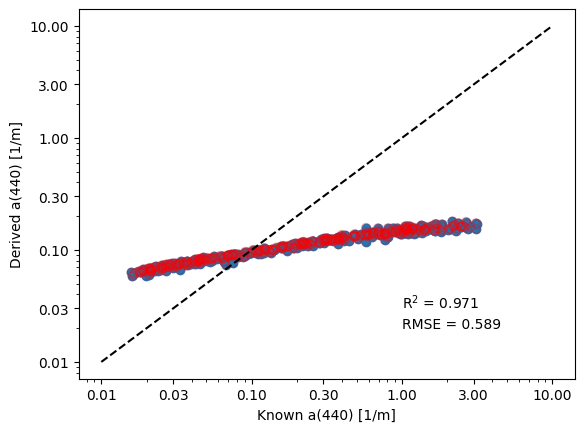

In [131]:
# Spectral-Ratio Algorithm with Chlorophyll Concentration as an Intermediate Link
# Morel and Maritorena, 2001.

excel_file1 = '/content/drive/MyDrive/Andre_Morel.xls'
data_frame_andre = pd.read_excel(excel_file1)

a0 = 0.366
a1 = -3.067
a2 = 1.93
a3 = 0.649
a4 = -1.532

p = np.log10(np.maximum(Rrs(440), Rrs(490), Rrs(510))/ Rrs(560))
C = 10**(a0 + a1*p +a2*p**2 + a3*p**3 + a4*p**4)                # Eq 4.7

# Eq 4.8
def Kd_a(wavelength):
  df = data_frame_andre
  idx = df.index[df['lambda'] == wavelength]

  Kw = df['Kw'][idx].values
  X = df['X'][idx].values
  e = df['X'][idx].values

  Kd = Kw + X*(C**e)    # 500 elements

  R = 6.8 * (Rrs(wavelength))                                 # Eq 4.10
  a = (0.9*Kd *(1-R)) / (1 + 2.25*R)                          # Eq 4.9
  
  return Kd, a

_ , a_derived = Kd_a(440)

a440_derived = a_derived
a440_known = a(440)

#r2, rmse = metrics(a440_known, a440_derived)
nb_obs, intercept_t1, intercept_t2, slope_t1, slope_t2, r2, rmse, bias = reg_statn(a440_known, a440_derived, log_base=10)

plotting (a440_known, a440_derived, r2, rmse)

# **Chapter : 5**
# Inversion of IOP based on Rrs and Remotely Retrieved Kd

In [36]:
sheet_name = 'Kd(0)'
# To read all sheets in the Excel file, omit the sheet_name parameter
data_frame_kd = pd.read_excel(excel_file, sheet_name=sheet_name)

def kd(wavelength):
  return data_frame_kd[wavelength].values


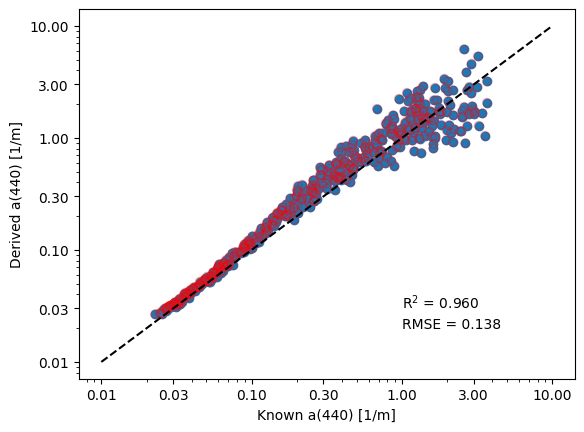

In [132]:
v1 = [-4.7636, -4.6216, -3.6636, -2.0152]
v2 = [-2.1269, -2.3587, -2.3116,-1.5296]
v3 = [3.1752, 3.1235, 2.5648, 1.7751] 
lamda_ = [410, 440, 490, 550]

q = Rrs(440) / Rrs(550)

def kd1(lamda):
  if lamda == 410:
    _lamda = 0
  if lamda == 440:
    _lamda = 1
  if lamda == 490:
    _lamda = 2
  if lamda == 550:
    _lamda = 3
  
  ratio = (v1[_lamda]* np.log10(q) + v2[_lamda]) / (v3[_lamda] + np.log10(q))

  return 10**ratio

kd440_derived = kd1(440)
kd440_known = kd(440) 

# r2, rmse = metrics(kd440_known, kd440_derived)
nb_obs, intercept_t1, intercept_t2, slope_t1, slope_t2, r2, rmse, bias = reg_statn(kd440_known, kd440_derived, log_base=10)

plotting (kd440_known, kd440_derived, r2, rmse)

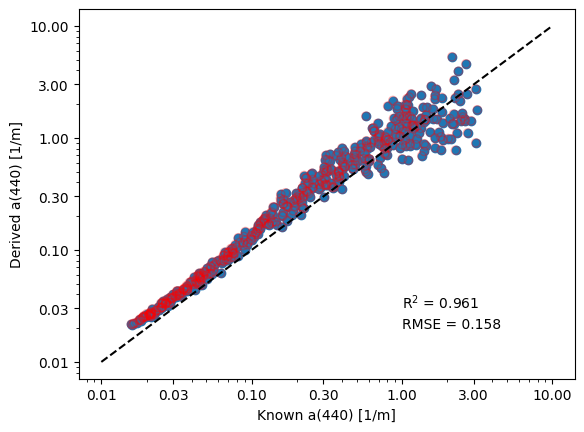

In [133]:
uw = 0.8660     # 30 ?
# uw = 0.9265     # using snells law; 22.089
lamda = 440
a440_derived = (uw * kd1(lamda)) / np.sqrt(1 + (2.54 - 6.5*uw + 19.89*uw**2 )*( Rrs(lamda)/(1-Rrs(lamda)) ) )

a440_known = a(440)

#r2, rmse = metrics(a440_known, a440_derived)
nb_obs, intercept_t1, intercept_t2, slope_t1, slope_t2, r2, rmse, bias = reg_statn(a440_known, a440_derived, log_base=10)

plotting (a440_known, a440_derived, r2, rmse)

In [ ]:
sheet_name = 'bb'
# To read all sheets in the Excel file, omit the sheet_name parameter
data_frame_bb = pd.read_excel(excel_file, sheet_name=sheet_name)

def bb(wavelength):
  return data_frame_bb[wavelength].values

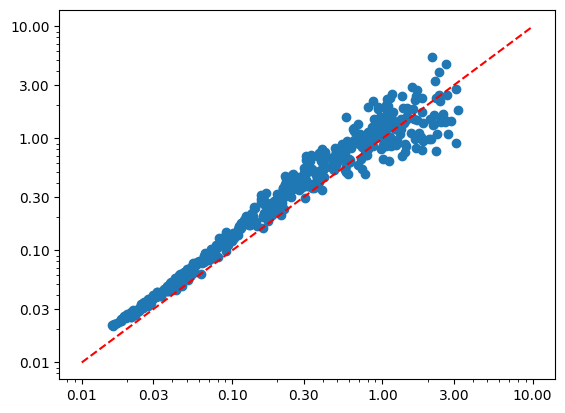

In [59]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Define the x-axis scale values

x_values = [0.01, 0.03, 0.1, 0.3, 1, 3,10]
x = x_values

plt.scatter(a440_known, a440_derived)
# Set the x-axis tick positions and labels


#'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'
scale = 'log'
plt.xscale(scale)
plt.yscale(scale)

plt.xticks(x_values)
plt.yticks(x_values)

formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.plot(x, x, linestyle='--', color='red')

# Show the plot
plt.show()

